# Car Price Prediction - Linear Regression

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_column', 100)

### Load Data

In [3]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.rename(columns={'car_ID' : 'carid', 'CarName': 'carname'}, inplace=True)
cars.set_index('carid', inplace=True)

In [5]:
cars.head()

,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
carid,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Analysis

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
carname             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [7]:
cars.isnull().sum()

symboling           0
carname             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**No Missing Data in data set**

In [8]:
#Check for duplicate rows
cars[cars.duplicated()]

,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
carid,,,,,,,,,,,,,,,,,,,,,,,,,


In [11]:
#Check for duplicate rows by removing 'Price' column
cars[cars[cars.columns[:-1]].duplicated()]

,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
carid,,,,,,,,,,,,,,,,,,,,,,,,,


**There is no duplicate rows in data set**

### Data Prepration

#### Numerical data

In [12]:
#Checking numerical data variable spread
cars.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


For all numerical fields gap between **Mean** and **Median** are very less.<BR>
So looks like there are no outliers in numerical data variables.

#### Categorical Data

In [15]:
cars['companyname'] = cars['carname'].apply(lambda x : x.split()[0])
cars.drop('carname', axis=1, inplace=True)

In [16]:
cars['companyname'].value_counts().sort_index()

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: companyname, dtype: int64

In [17]:
#Company name column data cleanup : few of the name are misspelled
compName = {'maxda' : 'mazda', 'Nissan' : 'nissan', 'porcshce' : 'porsche', 'toyouta' : 'toyota', 'vokswagen' : 'volkswagen', 'vw' : 'volkswagen'}
cars.replace({'companyname' : compName}, inplace=True)

In [18]:
cars['companyname'].value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: companyname, dtype: int64

In [19]:
cars_dup = cars.copy()

In [20]:
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
carid,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


List of categorical variables which need some manipulation

#### One Hot Encoding

In [21]:
print('************ Car Body ***********')
print(cars['carbody'].value_counts())
print()

print('************ Drive Wheel ***********')
print(cars['drivewheel'].value_counts())
print()

print('************ Engine Type ***********')
print(cars['enginetype'].value_counts())
print()

print('************ Fuel System ***********')
print(cars['fuelsystem'].value_counts())
print()

print('************ Company Name ***********')
print(cars['companyname'].value_counts())
print()

************ Car Body ***********
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

************ Drive Wheel ***********
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

************ Engine Type ***********
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

************ Fuel System ***********
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

************ Company Name ***********
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury     

In [22]:
tempCars = pd.get_dummies(cars['carbody'], drop_first=True)
cars = pd.concat([cars, tempCars], axis=1)
cars.drop('carbody', axis=1, inplace=True)

In [24]:
tempCars = pd.get_dummies(cars['drivewheel'], drop_first=True)
cars = pd.concat([cars, tempCars], axis=1)
cars.drop('drivewheel', axis=1, inplace=True)

In [25]:
tempCars = pd.get_dummies(cars['enginetype'], drop_first=True)
cars = pd.concat([cars, tempCars], axis=1)
cars.drop('enginetype', axis=1, inplace=True)

In [26]:
tempCars = pd.get_dummies(cars['fuelsystem'], drop_first=True)
cars = pd.concat([cars, tempCars], axis=1)
cars.drop('fuelsystem', axis=1, inplace=True)

In [27]:
tempCars = pd.get_dummies(cars['companyname'], drop_first=True)
cars = pd.concat([cars, tempCars], axis=1)
cars.drop('companyname', axis=1, inplace=True)

#### Binary Encoding

In [28]:
print('************ Symboling ***********')
print(cars['symboling'].value_counts())
print()

print('************ Fuel Type ***********')
print(cars['fueltype'].value_counts())
print()

print('************ Aspiration ***********')
print(cars['aspiration'].value_counts())
print()

print('************ Door Number ***********')
print(cars['doornumber'].value_counts())
print()

print('************ Engine Location ***********')
print(cars['enginelocation'].value_counts())
print()

************ Symboling ***********
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

************ Fuel Type ***********
gas       185
diesel     20
Name: fueltype, dtype: int64

************ Aspiration ***********
std      168
turbo     37
Name: aspiration, dtype: int64

************ Door Number ***********
four    115
two      90
Name: doornumber, dtype: int64

************ Engine Location ***********
front    202
rear       3
Name: enginelocation, dtype: int64



In [29]:
#Symboling column indicate insurance risk rating.
#+3 = Risk & -3 Is Safe
#So will convert this ordinal categorical variabl to Descending order of risk(Risk Rating)
cars['symboling'] = abs(cars['symboling'] - 4)

In [30]:
#Fule type is either Gas or Diesel : So we go for Binary Encoding
cars['fueltype_isgas'] = cars['fueltype'].apply(lambda x : 1 if x =='gas' else 0)
cars.drop('fueltype', axis=1, inplace=True)

In [31]:
#Aspiration is either Standard or Turbo : So we go for Binary Encoding
cars['aspiration_isstd'] = cars['aspiration'].apply(lambda x : 1 if x =='std' else 0)
cars.drop('aspiration', axis=1, inplace=True)

In [32]:
#Engine Location is either Front or Rear : So we go for Binary Encoding
cars['enginelocation_isfront'] = cars['enginelocation'].apply(lambda x : 1 if x =='front' else 0)
cars.drop('enginelocation', axis=1, inplace=True)

In [33]:
#Number of doors can have some numerical impact like 2 < 4 doors, so will convert to numerical var
#We have 2 possible values 2 or 4, so will also create one binary variable (will check performacne at the time of model building)
cars['doornumber_isfour'] = cars['doornumber'].apply(lambda x: 1 if x == 'four' else 0)
cars['doornumber'] = cars['doornumber'].apply(lambda x: 4 if x == 'four' else 2)

In [34]:
#Cylinder number have numerical impact on car performance : More number of cylinder = More Power
cylinderNo ={'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'twelve':12}
cars.replace({'cylindernumber' : cylinderNo}, inplace=True)

In [36]:
print('************ Symboling ***********')
print(cars['symboling'].value_counts())
print()

print('************ Fuel Type ***********')
print(cars['fueltype_isgas'].value_counts())
print()

print('************ Aspiration ***********')
print(cars['aspiration_isstd'].value_counts())
print()

print('************ Door Number ***********')
print(cars['doornumber'].value_counts())
print()

print('************ Engine Location ***********')
print(cars['enginelocation_isfront'].value_counts())
print()

print('************ Cylinder Number ***********')
print(cars['cylindernumber'].value_counts())

************ Symboling ***********
4    67
3    54
2    32
1    27
5    22
6     3
Name: symboling, dtype: int64

************ Fuel Type ***********
1    185
0     20
Name: fueltype_isgas, dtype: int64

************ Aspiration ***********
1    168
0     37
Name: aspiration_isstd, dtype: int64

************ Door Number ***********
4    115
2     90
Name: doornumber, dtype: int64

************ Engine Location ***********
1    202
0      3
Name: enginelocation_isfront, dtype: int64

************ Cylinder Number ***********
4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64


### EDA

In [37]:
cars_dup.columns[cars_dup.dtypes != 'object']

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

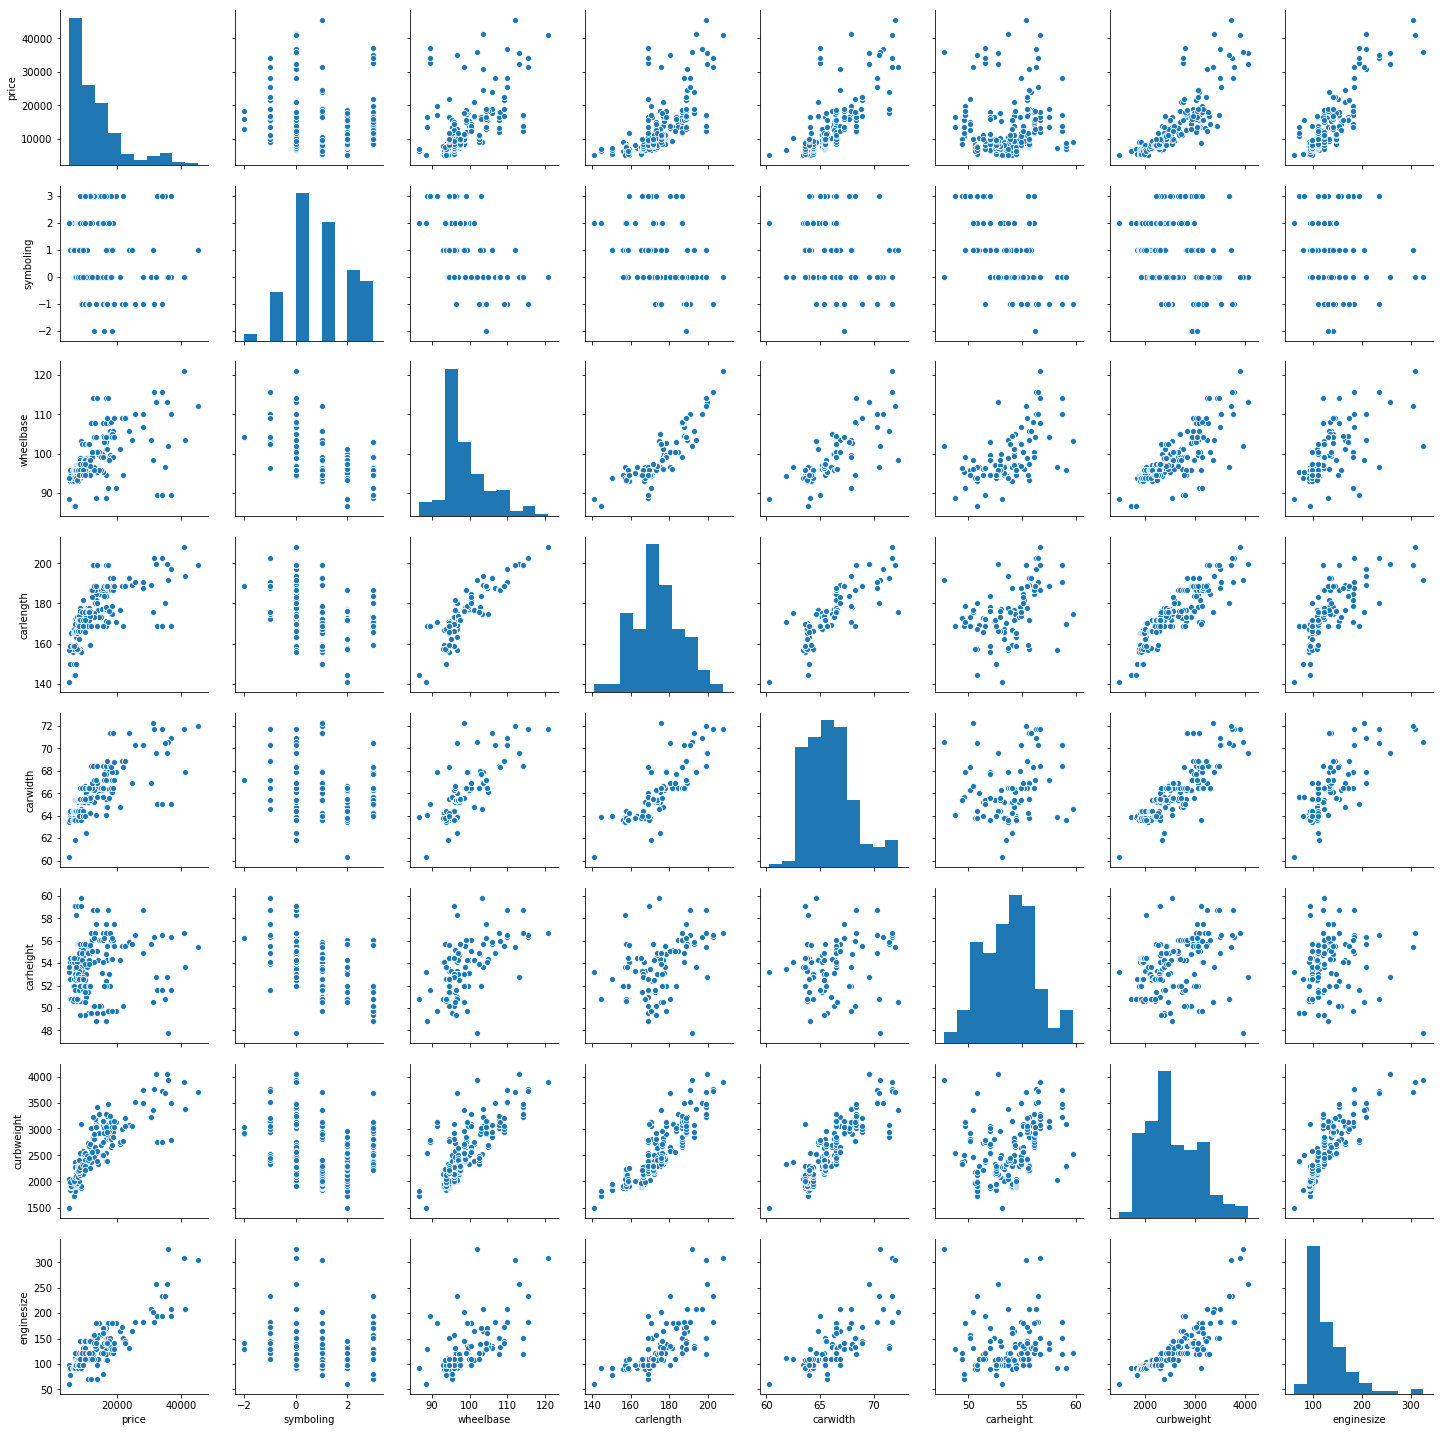

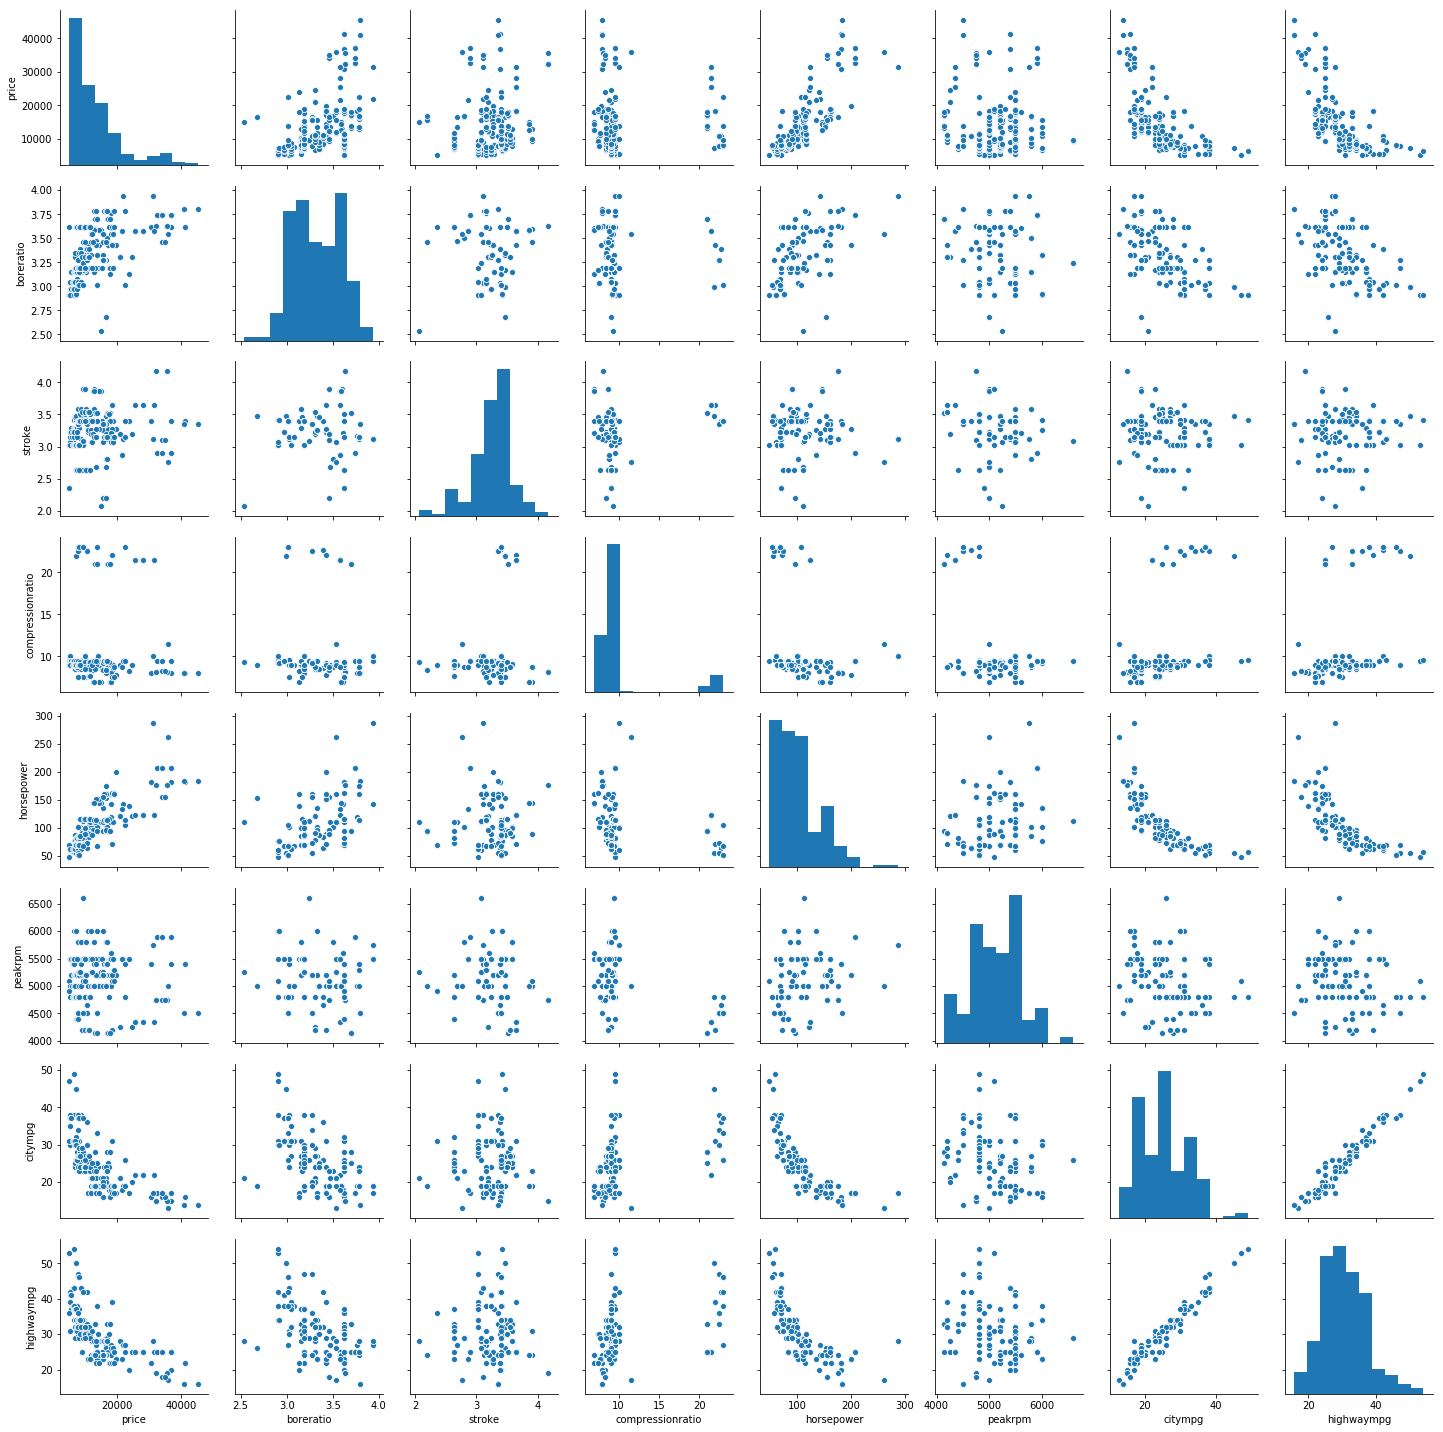

In [38]:
sns.pairplot(cars_dup[['price','symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize']])
sns.pairplot(cars_dup[['price','boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg']])
plt.show()

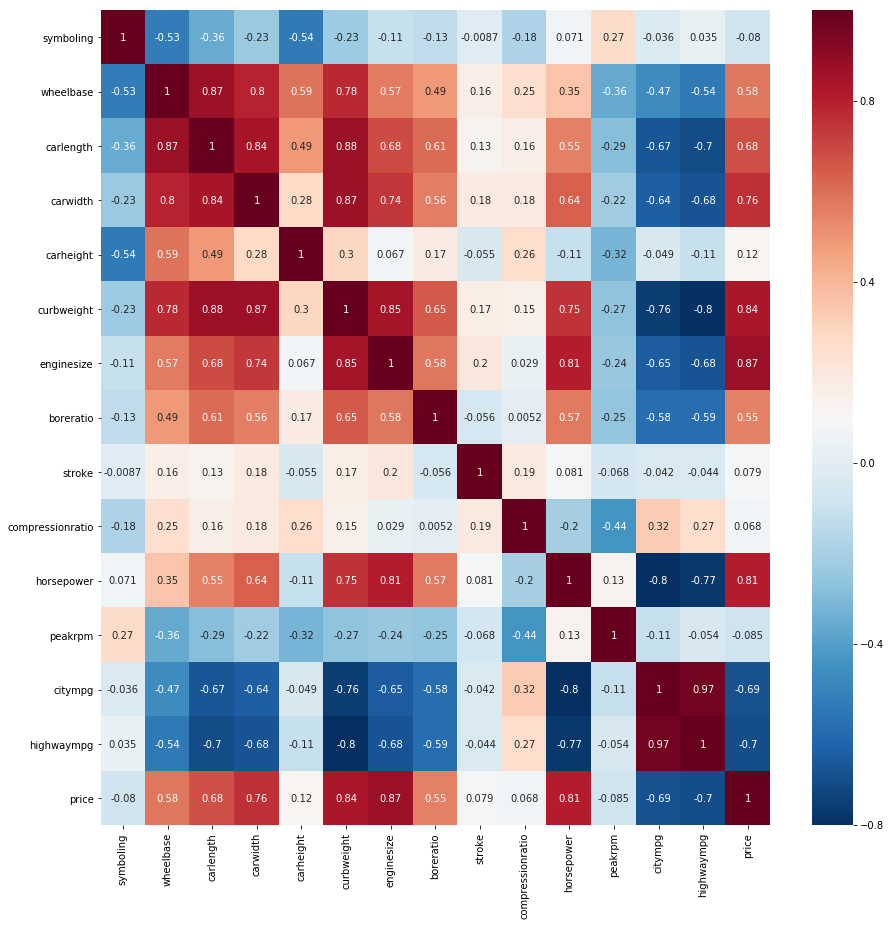

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(cars_dup.corr(), cmap='RdBu_r', annot=True)
plt.show()

**Engine Size, Curb Weight, Car Width, Hourse Power, Highway MPG** these variables are higly correlated to **Price** <BR>
Also **Wheel Base, Car Length, Bore Ratio, City MPG** these variables are correlated to **Price**
<BR><BR>
Apart from correlation with **Price**, all these variable are correlated with each other which might cause **Multi-colinearity** issue.
<BR><BR>
**Stroke, Symboling (Risk Rating), Car Height, Compression Ratio, Peak RPM** these variables not much impacting to **Price** (Will check this while model building)c

In [41]:
catVar = cars_dup.columns[cars_dup.dtypes == 'object']
catVar

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'companyname'],
      dtype='object')

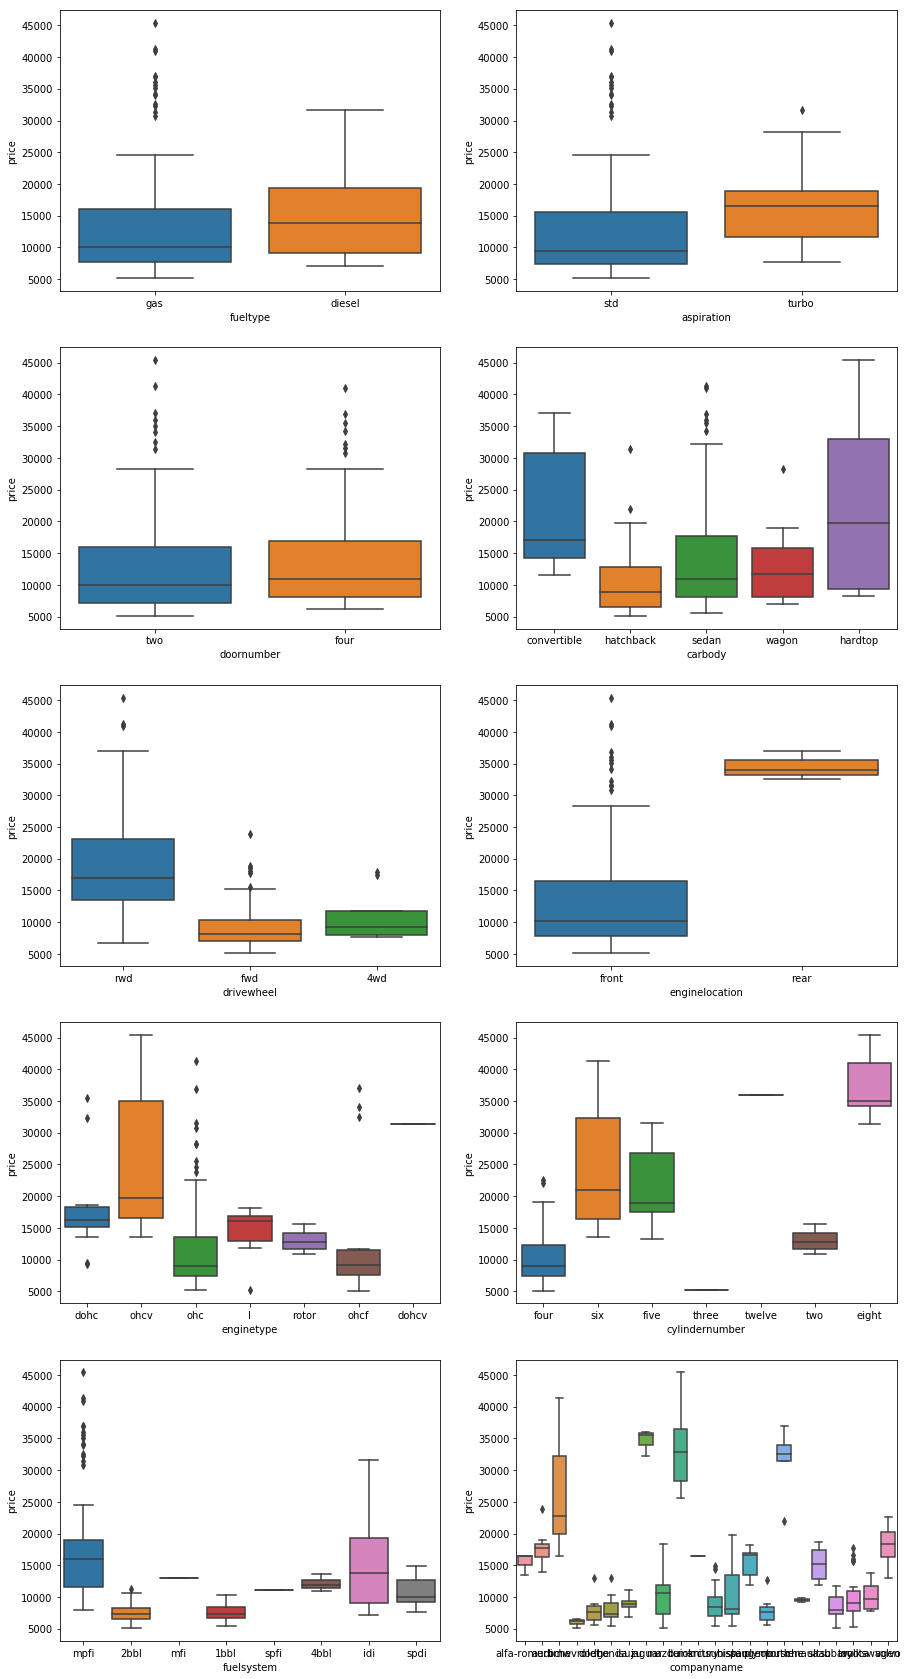

In [43]:
rows = 5
cols = 2
catCount = 0
plt.figure(figsize=(15,30))
for i in range(rows):
    for j in range(cols):
        plt.subplot(rows, cols, catCount + 1)
        sns.boxplot(data=cars_dup, x=catVar[catCount], y='price')
        catCount += 1

plt.show()

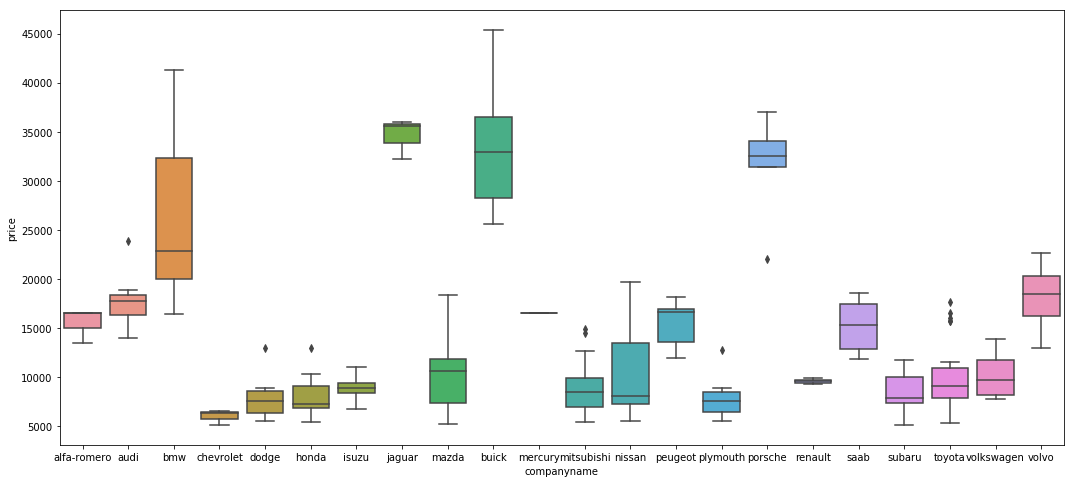

In [44]:
plt.figure(figsize=(18,8))
sns.boxplot(data=cars_dup, x='companyname', y='price')
plt.show()

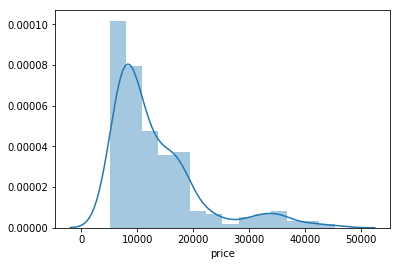

In [45]:
sns.distplot(cars_dup['price'])
plt.show()